In [33]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from itertools import product
import matplotlib.pyplot as plt

In [34]:
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

In [308]:
kernel=tf.constant([[-1,-1,-1],[0,9,0],[-1,-1,-1]])

In [309]:
image = tf.io.read_file('Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

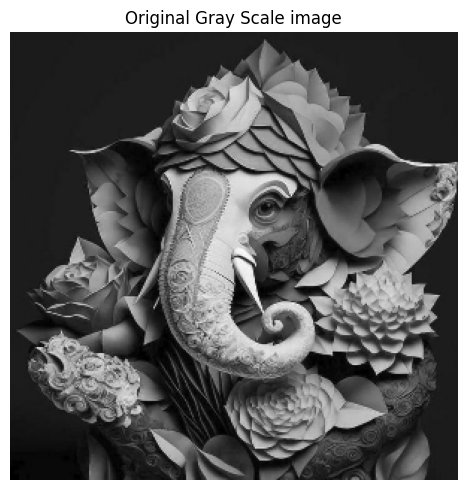

In [310]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


In [311]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [312]:
conv_fn = tf.nn.conv2d

In [313]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

In [314]:
plt.figure(figsize=(15, 5));

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

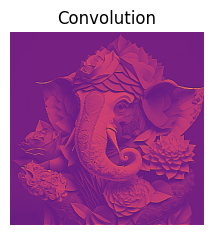

In [315]:
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')


In [316]:
relu_fn = tf.nn.relu

In [317]:
image_detect = relu_fn(image_filter)

Text(0.5, 1.0, 'Activation')

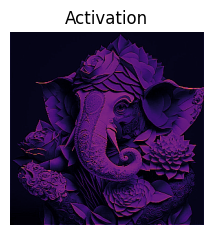

In [318]:
plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')


In [319]:
pool = tf.nn.pool
image_condense = pool(input=image_detect, 
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )


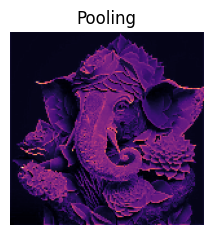

In [320]:
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()